### OLS Regression of a rotated Bivariate Normal sample
If we:
- generate *n* observations, *X ~ Normal(0,1)* and *Y ~ Normal(0,0.2) [where the second value represents standard deviation], 
- plot on the Cartesian coordinates *(x,y)* and then rotate by 45 degrees, 
- then perform regression using ordinary least squares (OLS),  

what is the expected value of *b1* (the estimated coefficient of *x*)?


#### Begin by generating and plotting original Xs and Ys

Text(0.5, 1.0, 'original X and Y')

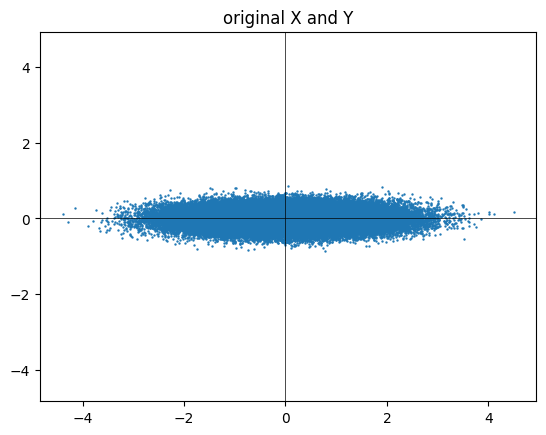

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# generate observations
n = 100000
X = np.random.normal(loc=0, scale=1.0, size=n)
Y = np.random.normal(loc=0, scale=0.2, size=n)

# plot our observations
plt.scatter(X, Y, s=0.5)
plt.axhline(y=0, color='k', **{'lw':0.5})
plt.axvline(x=0, color='k', **{'lw':0.5})
plt.ylim(plt.gca().get_xlim())
plt.title('original X and Y')

#### Perform rotation

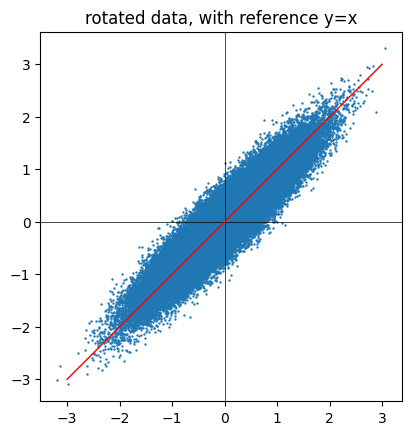

In [85]:
# combine as a matrix M
M = np.array([X,Y])

# set rotation and slope reference line (y=0 subject to the rotation)
theta = np.pi / 4
m = np.tan(theta)

# create rotation matrix R
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

# find rotated dataset Mt, and corresponding transformed values for X and Y
Mt = R @ M
Xt = Mt[0]
Yt = Mt[1]

fig0, ax = plt.subplots()
ax.scatter(Xt, Yt, s=0.5, label='data')
ax.set_aspect('equal')
ax.axhline(y=0, color='k', **{'lw':0.5}, label='_x')
ax.axvline(x=0, color='k', **{'lw':0.5}, label='_y')
ax.plot([-3,3], [-3*m,3*m], color='r', lw=1, label='y=x')
#plt.ylim(plt.gca().get_xlim())
ax.set_title('rotated data, with reference y=x')
plt.show(fig0)

In [90]:
# some statistics:
print('E[Xt]', np.mean(Xt))
print('E[Yt]', np.mean(Yt))
print('E[XtYt]', np.mean(Xt*Yt))
print('Var(Xt)', np.var(Xt))


E[Xt] -0.001556412397827177
E[Yt] -0.0012664209803384238
E[XtYt] 0.4792621587631958
Var(Xt) 0.519028936240556


#### Estimation of $b_1$
It is intuitive and tempting to assume that regression using OLS will find a coefficient *b1* with an expected value of *1*, since the line bisecting the data is on average *y=x*  
Let us see if this is indeed the case: 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 14 Jul 2023   Prob (F-statistic):                nan
Time:                        19:05:04   Log-Likelihood:                -13907.
No. Observations:              100000   AIC:                         2.782e+04
Df Residuals:                   99999   BIC:                         2.783e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9234      0.001    756.505      0.0

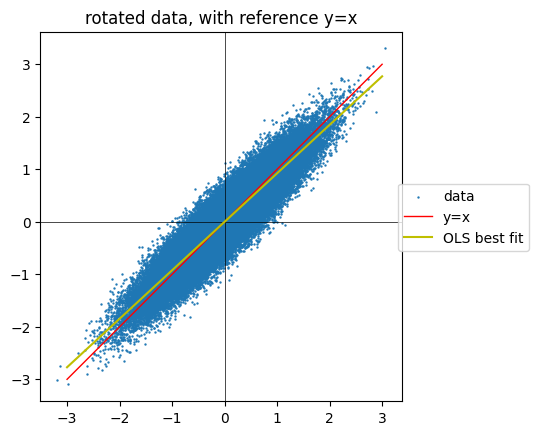

In [87]:
import statsmodels.api as sm

# perform regression using OLS
modOLS = sm.OLS(Yt, Xt, hasconst=True).fit()

#view model summary
print(modOLS.summary())
print(modOLS.params)

b1 = modOLS.params[0]
fig0.gca().plot([-3,3], [-3*b1,3*b1], color='y', label='OLS best fit')
fig0.legend(loc='center right')
fig0


We see the line of best fit is in fact not the same as $y=x$, rather, we have a lesser slope of approximately $b1=0.923$, i.e. $y=0.923x$ ! Why?

Out of curiosity let's first check the QQ plot to see if residuals are normal:

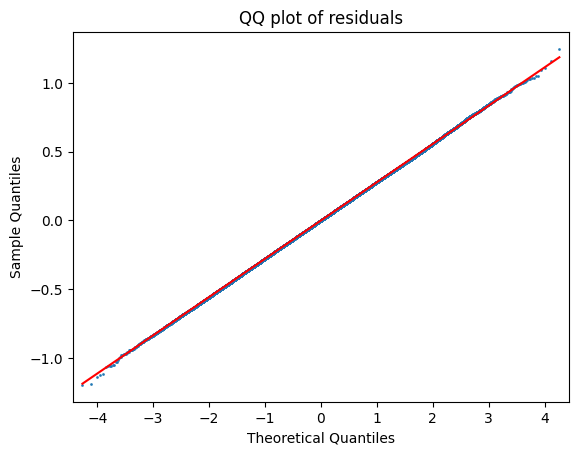

MSE: 0.07732583294592235


In [88]:

# look at residuals
res = Yt - (b1 * Xt)
#print (res)
#fig1 = plt.scatter(Xt, res, s=0.5)
#plt.show(fig1)
fig2 = sm.qqplot(res, line='s', **{'markersize':1, 'alpha':0.9})  #, **{'markersize':0.5}
fig2.gca().set_title('QQ plot of residuals')
plt.show(fig2)

# MSE
print('MSE:', np.sum(res**2) / n)

We see residuals are normal, so returning to the question, why is our intuition wrong?
Looking at our data again:

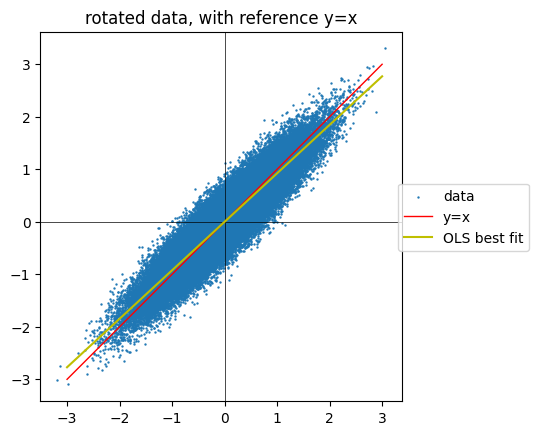

In [89]:
fig0

The answer is that the rotation has skewed the association of $x's$ and $y's$ so that, for example, in the upper right corner (high $x$ values) each $x$ has fewer $y's$ above the line of bisection, and closer to it, and more below it, and farther away (and vice versa in the lower left quadrant).  This means the line of best fit is actually lagged back towards the *x*-axis.

#### Mathematical explanation
Mathematically, the transformation induces a covariance between x and y (where originally there was none, i.e. $Cov(X,Y)=0$).
Because the OLS estimator for $b_1$ in the bivariate case is [known to be]  

>    $b_1 = Cov(X',Y')/Var(X')$

where  
> $X' = R_{11}X + R_{12}Y$ and $Y' = R_{21}X + R_{22}Y$
 
and it can be shown that if we start with $Cov(X,Y)=0$  
(and given $Var(X)=1$, $Var(Y)= \sqrt{.2} = 0.04$ and $\theta= \pi/4$)  

> $Cov(X',Y') = cos \theta sin\theta (Var(X) - Var(Y)) = 0.5 (1 - 0.04) = 0.48$

and 
> $Var(X') = E[(cos\theta X - sin\theta Y)^2] = cos^2\theta Var(X) + sin^2\theta Var(Y) = 0.5 + (0.5 * 0.04) = 0.5 + 0.02 = 0.52$

Therefore $b_1 = 0.48 / 0.52 \approx 0.923$ !

[known to be]: https://stats.stackexchange.com/a/555869